In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

Using TensorFlow backend.


In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,1
1,2,DSCF0900.JPG,800,specialty,1
2,3,DSCF0904.JPG,1250,specialty,1
3,4,DSCF0905.JPG,400,specialty,1
4,5,DSCF0910.JPG,800,specialty,1
...,...,...,...,...,...
535,536,DSCF1724.JPG,800,exchange,3
536,537,DSCF1725.JPG,1250,exchange,3
537,538,DSCF1726.JPG,400,exchange,3
538,539,DSCF1727.JPG,800,exchange,3


In [0]:
width = 265#1920#530#265
height = 149#1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/540 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6DA60EF7B8>


  0%|          | 1/540 [00:03<35:48,  3.99s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36A20208>


  0%|          | 2/540 [00:05<30:14,  3.37s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36A20208>


  1%|          | 3/540 [00:06<22:34,  2.52s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369B0898>


  1%|          | 4/540 [00:07<19:40,  2.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D37235AC8>


  1%|          | 5/540 [00:09<17:24,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369B79B0>


  1%|          | 6/540 [00:10<15:41,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369B1710>


  1%|▏         | 7/540 [00:11<13:04,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369BC4A8>


  1%|▏         | 8/540 [00:12<11:20,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36A28470>


  2%|▏         | 9/540 [00:13<10:54,  1.23s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36A28470>


  2%|▏         | 10/540 [00:15<13:51,  1.57s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36A28470>


  2%|▏         | 11/540 [00:17<14:28,  1.64s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369B5320>


  2%|▏         | 12/540 [00:20<16:53,  1.92s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369C12E8>


  2%|▏         | 13/540 [00:22<17:53,  2.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369C12E8>


  3%|▎         | 14/540 [00:23<15:17,  1.74s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369C12E8>


  3%|▎         | 15/540 [00:24<13:00,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369C12E8>


  3%|▎         | 16/540 [00:26<13:54,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369C12E8>


  3%|▎         | 17/540 [00:28<14:48,  1.70s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369C12E8>


  3%|▎         | 18/540 [00:28<12:27,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CB668>


  4%|▎         | 19/540 [00:30<14:02,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CB668>


  4%|▎         | 20/540 [00:33<16:34,  1.91s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CF940>


  4%|▍         | 21/540 [00:35<16:56,  1.96s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CDFD0>


  4%|▍         | 22/540 [00:37<16:56,  1.96s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CFE80>


  4%|▍         | 23/540 [00:39<16:58,  1.97s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CFE80>


  4%|▍         | 24/540 [00:40<13:42,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369CF940>


  5%|▍         | 25/540 [00:42<13:52,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D04A8>


  5%|▍         | 26/540 [00:43<14:28,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0EB8>


  5%|▌         | 27/540 [00:46<16:13,  1.90s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0DA0>


  5%|▌         | 28/540 [00:48<16:16,  1.91s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D04A8>


  5%|▌         | 29/540 [00:50<16:39,  1.96s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0EB8>


  6%|▌         | 30/540 [00:52<16:08,  1.90s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0A20>


  6%|▌         | 31/540 [00:53<16:01,  1.89s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0EF0>


  6%|▌         | 32/540 [00:56<16:59,  2.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0B00>


  6%|▌         | 33/540 [00:57<14:05,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0FD0>


  6%|▋         | 34/540 [00:58<13:45,  1.63s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0C50>


  6%|▋         | 35/540 [00:59<11:39,  1.39s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0C50>


  7%|▋         | 36/540 [01:00<10:39,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0C50>


  7%|▋         | 37/540 [01:01<09:16,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D0898>


  7%|▋         | 38/540 [01:02<10:10,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1CF8>


  7%|▋         | 39/540 [01:04<11:48,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1A58>


  7%|▋         | 40/540 [01:06<13:38,  1.64s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1EF0>


  8%|▊         | 41/540 [01:08<14:40,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1438>


  8%|▊         | 42/540 [01:11<16:30,  1.99s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1828>


  8%|▊         | 43/540 [01:12<13:52,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1240>


  8%|▊         | 44/540 [01:14<14:32,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1908>


  8%|▊         | 45/540 [01:14<11:37,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1550>


  9%|▊         | 46/540 [01:16<12:50,  1.56s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1240>


  9%|▊         | 47/540 [01:17<11:29,  1.40s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1320>


  9%|▉         | 48/540 [01:18<11:04,  1.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1550>


  9%|▉         | 49/540 [01:21<13:20,  1.63s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1550>


  9%|▉         | 50/540 [01:23<14:21,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1320>


  9%|▉         | 51/540 [01:25<15:04,  1.85s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1080>


 10%|▉         | 52/540 [01:27<16:23,  2.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1080>


 10%|▉         | 53/540 [01:29<16:02,  1.98s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1B00>


 10%|█         | 54/540 [01:31<16:47,  2.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1B00>


 10%|█         | 55/540 [01:34<17:20,  2.14s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1320>


 10%|█         | 56/540 [01:35<16:31,  2.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1320>


 11%|█         | 57/540 [01:36<13:37,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1588>


 11%|█         | 58/540 [01:37<10:55,  1.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1588>


 11%|█         | 59/540 [01:39<12:17,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1E80>


 11%|█         | 60/540 [01:41<12:45,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D17B8>


 11%|█▏        | 61/540 [01:43<13:30,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1E10>


 11%|█▏        | 62/540 [01:44<13:13,  1.66s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1780>


 12%|█▏        | 63/540 [01:45<11:21,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1748>


 12%|█▏        | 64/540 [01:47<11:52,  1.50s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D12E8>


 12%|█▏        | 65/540 [01:48<10:35,  1.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1940>


 12%|█▏        | 66/540 [01:49<10:55,  1.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D16A0>


 12%|█▏        | 67/540 [01:50<09:25,  1.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1588>


 13%|█▎        | 68/540 [01:50<07:57,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1C18>


 13%|█▎        | 69/540 [01:51<07:24,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1B00>


 13%|█▎        | 70/540 [01:52<07:58,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D1B00>


 13%|█▎        | 71/540 [01:54<08:33,  1.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D16A0>


 13%|█▎        | 72/540 [01:56<10:17,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7518>


 14%|█▎        | 73/540 [01:56<08:55,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7B00>


 14%|█▎        | 74/540 [01:57<08:01,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D76A0>


 14%|█▍        | 75/540 [01:59<09:14,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7EB8>


 14%|█▍        | 76/540 [02:00<10:39,  1.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7E80>


 14%|█▍        | 77/540 [02:01<09:17,  1.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7358>


 14%|█▍        | 78/540 [02:02<08:35,  1.12s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7630>


 15%|█▍        | 79/540 [02:03<07:45,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7B00>


 15%|█▍        | 80/540 [02:05<10:58,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7978>


 15%|█▌        | 81/540 [02:07<10:26,  1.37s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7588>


 15%|█▌        | 82/540 [02:07<08:58,  1.17s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7550>


 15%|█▌        | 83/540 [02:08<08:41,  1.14s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7550>


 16%|█▌        | 84/540 [02:10<09:45,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7550>


 16%|█▌        | 85/540 [02:12<11:05,  1.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7DD8>


 16%|█▌        | 86/540 [02:14<11:37,  1.54s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7E10>


 16%|█▌        | 87/540 [02:14<09:56,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7C88>


 16%|█▋        | 88/540 [02:16<11:13,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7CF8>


 16%|█▋        | 89/540 [02:17<09:34,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7CF8>


 17%|█▋        | 90/540 [02:18<08:40,  1.16s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D70B8>


 17%|█▋        | 91/540 [02:20<10:08,  1.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7748>


 17%|█▋        | 92/540 [02:22<11:18,  1.51s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7E80>


 17%|█▋        | 93/540 [02:23<10:35,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7160>


 17%|█▋        | 94/540 [02:24<09:13,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7D68>


 18%|█▊        | 95/540 [02:25<10:31,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7828>


 18%|█▊        | 96/540 [02:26<09:38,  1.30s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7CF8>


 18%|█▊        | 97/540 [02:27<08:43,  1.18s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D75C0>


 18%|█▊        | 98/540 [02:28<07:45,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D72B0>


 18%|█▊        | 99/540 [02:30<10:37,  1.45s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7710>


 19%|█▊        | 100/540 [02:32<11:02,  1.51s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7668>


 19%|█▊        | 101/540 [02:33<09:21,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7908>


 19%|█▉        | 102/540 [02:34<08:13,  1.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D70F0>


 19%|█▉        | 103/540 [02:36<09:50,  1.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D73C8>


 19%|█▉        | 104/540 [02:37<09:18,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D73C8>


 19%|█▉        | 105/540 [02:39<10:43,  1.48s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D7B70>


 20%|█▉        | 106/540 [02:40<11:22,  1.57s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D75C0>


 20%|█▉        | 107/540 [02:42<12:08,  1.68s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369D70F0>


 20%|██        | 108/540 [02:44<11:27,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1DA0>


 20%|██        | 109/540 [02:44<09:30,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1470>


 20%|██        | 110/540 [02:45<08:14,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E15C0>


 21%|██        | 111/540 [02:46<07:23,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E15C0>


 21%|██        | 112/540 [02:48<09:06,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1358>


 21%|██        | 113/540 [02:49<08:37,  1.21s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1DA0>


 21%|██        | 114/540 [02:52<12:26,  1.75s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E15F8>


 21%|██▏       | 115/540 [02:53<11:30,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1550>


 21%|██▏       | 116/540 [02:55<12:31,  1.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1B00>


 22%|██▏       | 117/540 [02:56<10:23,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1240>


 22%|██▏       | 118/540 [02:58<11:47,  1.68s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1080>


 22%|██▏       | 119/540 [02:59<09:39,  1.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E18D0>


 22%|██▏       | 120/540 [03:01<11:39,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1240>


 22%|██▏       | 121/540 [03:02<09:34,  1.37s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E19E8>


 23%|██▎       | 122/540 [03:04<11:18,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E19E8>


 23%|██▎       | 123/540 [03:06<10:54,  1.57s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E18D0>


 23%|██▎       | 124/540 [03:07<11:32,  1.66s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1320>


 23%|██▎       | 125/540 [03:08<09:38,  1.39s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1978>


 23%|██▎       | 126/540 [03:10<10:34,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E10B8>


 24%|██▎       | 127/540 [03:12<11:09,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E16D8>


 24%|██▎       | 128/540 [03:14<12:57,  1.89s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1208>


 24%|██▍       | 129/540 [03:17<15:01,  2.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1978>


 24%|██▍       | 130/540 [03:18<11:56,  1.75s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1CF8>


 24%|██▍       | 131/540 [03:19<09:33,  1.40s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E18D0>


 24%|██▍       | 132/540 [03:20<09:21,  1.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1358>


 25%|██▍       | 133/540 [03:21<08:17,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1390>


 25%|██▍       | 134/540 [03:23<10:35,  1.56s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1BA8>


 25%|██▌       | 135/540 [03:24<10:04,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1EF0>


 25%|██▌       | 136/540 [03:25<08:11,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E10B8>


 25%|██▌       | 137/540 [03:27<10:37,  1.58s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E10B8>


 26%|██▌       | 138/540 [03:28<09:14,  1.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1A20>


 26%|██▌       | 139/540 [03:30<10:01,  1.50s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1A20>


 26%|██▌       | 140/540 [03:31<08:55,  1.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1A20>


 26%|██▌       | 141/540 [03:32<07:53,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1A20>


 26%|██▋       | 142/540 [03:33<07:27,  1.12s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1A20>


 26%|██▋       | 143/540 [03:34<07:12,  1.09s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E1940>


 27%|██▋       | 144/540 [03:35<06:35,  1.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9550>


 27%|██▋       | 145/540 [03:36<06:13,  1.06it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9860>


 27%|██▋       | 146/540 [03:37<07:34,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E95F8>


 27%|██▋       | 147/540 [03:38<06:53,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9DA0>


 27%|██▋       | 148/540 [03:39<06:33,  1.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9B70>


 28%|██▊       | 149/540 [03:40<06:06,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9550>


 28%|██▊       | 150/540 [03:40<05:49,  1.12it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9160>


 28%|██▊       | 151/540 [03:48<19:00,  2.93s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9710>


 28%|██▊       | 152/540 [03:49<15:13,  2.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9C18>


 28%|██▊       | 153/540 [03:52<15:08,  2.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E99B0>


 29%|██▊       | 154/540 [03:53<12:39,  1.97s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9550>


 29%|██▊       | 155/540 [03:54<10:41,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9470>


 29%|██▉       | 156/540 [03:55<10:21,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9940>


 29%|██▉       | 157/540 [03:57<10:40,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9C18>


 29%|██▉       | 158/540 [03:58<08:56,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E90B8>


 29%|██▉       | 159/540 [03:58<07:44,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9550>


 30%|██▉       | 160/540 [04:00<09:02,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E91D0>


 30%|██▉       | 161/540 [04:01<07:27,  1.18s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9BA8>


 30%|███       | 162/540 [04:02<06:37,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9550>


 30%|███       | 163/540 [04:02<06:04,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9208>


 30%|███       | 164/540 [04:03<05:40,  1.10it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E90F0>


 31%|███       | 165/540 [04:05<07:40,  1.23s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9128>


 31%|███       | 166/540 [04:06<06:46,  1.09s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9128>


 31%|███       | 167/540 [04:08<08:12,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9550>


 31%|███       | 168/540 [04:09<07:25,  1.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9898>


 31%|███▏      | 169/540 [04:09<06:32,  1.06s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9128>


 31%|███▏      | 170/540 [04:10<06:02,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9780>


 32%|███▏      | 171/540 [04:11<05:44,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E94E0>


 32%|███▏      | 172/540 [04:12<05:56,  1.03it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9390>


 32%|███▏      | 173/540 [04:13<06:24,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E97F0>


 32%|███▏      | 174/540 [04:15<07:11,  1.18s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9898>


 32%|███▏      | 175/540 [04:17<09:03,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9278>


 33%|███▎      | 176/540 [04:19<10:35,  1.74s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9710>


 33%|███▎      | 177/540 [04:20<09:14,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9710>


 33%|███▎      | 178/540 [04:22<09:48,  1.63s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9710>


 33%|███▎      | 179/540 [04:23<08:12,  1.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9B70>


 33%|███▎      | 180/540 [04:26<10:48,  1.80s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369E9710>


 34%|███▎      | 181/540 [04:28<10:43,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971E80>


 34%|███▎      | 182/540 [04:29<09:39,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971278>


 34%|███▍      | 183/540 [04:30<08:08,  1.37s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369717F0>


 34%|███▍      | 184/540 [04:31<07:41,  1.30s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971208>


 34%|███▍      | 185/540 [04:31<06:36,  1.12s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971128>


 34%|███▍      | 186/540 [04:33<06:43,  1.14s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971160>


 35%|███▍      | 187/540 [04:34<07:52,  1.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971518>


 35%|███▍      | 188/540 [04:36<07:45,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971A90>


 35%|███▌      | 189/540 [04:36<06:30,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971160>


 35%|███▌      | 190/540 [04:38<07:48,  1.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971358>


 35%|███▌      | 191/540 [04:40<08:51,  1.52s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971940>


 36%|███▌      | 192/540 [04:41<07:28,  1.29s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971080>


 36%|███▌      | 193/540 [04:42<06:23,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971080>


 36%|███▌      | 194/540 [04:42<05:49,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971240>


 36%|███▌      | 195/540 [04:44<05:57,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971748>


 36%|███▋      | 196/540 [04:45<07:24,  1.29s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971E48>


 36%|███▋      | 197/540 [04:46<06:01,  1.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971A58>


 37%|███▋      | 198/540 [04:47<05:48,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971C88>


 37%|███▋      | 199/540 [04:49<07:13,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971748>


 37%|███▋      | 200/540 [04:50<06:43,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971860>


 37%|███▋      | 201/540 [04:52<08:40,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971EF0>


 37%|███▋      | 202/540 [04:54<09:01,  1.60s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369715F8>


 38%|███▊      | 203/540 [04:55<08:22,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971198>


 38%|███▊      | 204/540 [04:56<06:59,  1.25s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971710>


 38%|███▊      | 205/540 [04:56<05:44,  1.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971160>


 38%|███▊      | 206/540 [04:57<05:46,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971EB8>


 38%|███▊      | 207/540 [04:58<04:53,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971C88>


 39%|███▊      | 208/540 [04:59<05:34,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971278>


 39%|███▊      | 209/540 [05:01<06:56,  1.26s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971A58>


 39%|███▉      | 210/540 [05:03<07:41,  1.40s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971828>


 39%|███▉      | 211/540 [05:03<06:18,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971400>


 39%|███▉      | 212/540 [05:04<05:52,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971400>


 39%|███▉      | 213/540 [05:07<08:02,  1.48s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971400>


 40%|███▉      | 214/540 [05:08<08:47,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36971390>


 40%|███▉      | 215/540 [05:10<07:56,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B710>


 40%|████      | 216/540 [05:11<08:13,  1.52s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BC18>


 40%|████      | 217/540 [05:12<07:00,  1.30s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B2E8>


 40%|████      | 218/540 [05:13<06:14,  1.16s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BCF8>


 41%|████      | 219/540 [05:15<07:32,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B780>


 41%|████      | 220/540 [05:17<08:14,  1.55s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B208>


 41%|████      | 221/540 [05:19<08:44,  1.64s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B390>


 41%|████      | 222/540 [05:20<08:35,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B780>


 41%|████▏     | 223/540 [05:21<07:11,  1.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BB00>


 41%|████▏     | 224/540 [05:23<08:01,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B860>


 42%|████▏     | 225/540 [05:25<08:38,  1.65s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B860>


 42%|████▏     | 226/540 [05:26<07:16,  1.39s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B978>


 42%|████▏     | 227/540 [05:26<06:21,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B9B0>


 42%|████▏     | 228/540 [05:29<08:59,  1.73s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B9B0>


 42%|████▏     | 229/540 [05:31<09:12,  1.78s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B588>


 43%|████▎     | 230/540 [05:32<07:47,  1.51s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B978>


 43%|████▎     | 231/540 [05:33<06:31,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B358>


 43%|████▎     | 232/540 [05:34<05:42,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B550>


 43%|████▎     | 233/540 [05:34<05:08,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BDA0>


 43%|████▎     | 234/540 [05:36<05:39,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B0F0>


 44%|████▎     | 235/540 [05:36<05:08,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B550>


 44%|████▎     | 236/540 [05:37<05:08,  1.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B898>


 44%|████▍     | 237/540 [05:39<05:22,  1.06s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B6D8>


 44%|████▍     | 238/540 [05:40<06:31,  1.30s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B828>


 44%|████▍     | 239/540 [05:42<06:33,  1.31s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B278>


 44%|████▍     | 240/540 [05:43<05:56,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B9B0>


 45%|████▍     | 241/540 [05:44<05:43,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B550>


 45%|████▍     | 242/540 [05:45<05:53,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BEB8>


 45%|████▌     | 243/540 [05:46<05:19,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BB38>


 45%|████▌     | 244/540 [05:47<04:51,  1.02it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BE48>


 45%|████▌     | 245/540 [05:47<04:35,  1.07it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B0B8>


 46%|████▌     | 246/540 [05:48<04:33,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B0F0>


 46%|████▌     | 247/540 [05:49<04:19,  1.13it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B240>


 46%|████▌     | 248/540 [05:51<05:11,  1.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697B898>


 46%|████▌     | 249/540 [05:53<07:46,  1.60s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BC50>


 46%|████▋     | 250/540 [05:54<06:24,  1.33s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BC50>


 46%|████▋     | 251/540 [05:55<05:37,  1.17s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3697BEB8>


 47%|████▋     | 252/540 [05:56<05:12,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981550>


 47%|████▋     | 253/540 [05:57<04:46,  1.00it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981550>


 47%|████▋     | 254/540 [05:57<04:24,  1.08it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981550>


 47%|████▋     | 255/540 [05:59<04:57,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981160>


 47%|████▋     | 256/540 [06:00<05:15,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981550>


 48%|████▊     | 257/540 [06:03<07:22,  1.56s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369810F0>


 48%|████▊     | 258/540 [06:04<06:43,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981E10>


 48%|████▊     | 259/540 [06:04<05:44,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981EB8>


 48%|████▊     | 260/540 [06:06<06:43,  1.44s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981470>


 48%|████▊     | 261/540 [06:07<05:58,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981BA8>


 49%|████▊     | 262/540 [06:09<06:41,  1.44s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369814E0>


 49%|████▊     | 263/540 [06:10<05:43,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369814E0>


 49%|████▉     | 264/540 [06:12<07:26,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981518>


 49%|████▉     | 265/540 [06:14<07:50,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981470>


 49%|████▉     | 266/540 [06:15<06:25,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981D68>


 49%|████▉     | 267/540 [06:18<08:22,  1.84s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981E10>


 50%|████▉     | 268/540 [06:20<08:28,  1.87s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981E10>


 50%|████▉     | 269/540 [06:22<09:28,  2.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981978>


 50%|█████     | 270/540 [06:23<07:37,  1.70s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369818D0>


 50%|█████     | 271/540 [06:25<07:31,  1.68s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981780>


 50%|█████     | 272/540 [06:25<06:07,  1.37s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981588>


 51%|█████     | 273/540 [06:27<05:40,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981518>


 51%|█████     | 274/540 [06:28<06:31,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981550>


 51%|█████     | 275/540 [06:30<06:10,  1.40s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981898>


 51%|█████     | 276/540 [06:31<05:23,  1.23s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981518>


 51%|█████▏    | 277/540 [06:31<04:44,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981550>


 51%|█████▏    | 278/540 [06:32<04:22,  1.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981780>


 52%|█████▏    | 279/540 [06:33<04:49,  1.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981898>


 52%|█████▏    | 280/540 [06:35<05:49,  1.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981D30>


 52%|█████▏    | 281/540 [06:37<06:35,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981AC8>


 52%|█████▏    | 282/540 [06:38<05:39,  1.31s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981860>


 52%|█████▏    | 283/540 [06:40<06:16,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981390>


 53%|█████▎    | 284/540 [06:42<07:04,  1.66s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981518>


 53%|█████▎    | 285/540 [06:44<07:05,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981518>


 53%|█████▎    | 286/540 [06:45<05:58,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981DA0>


 53%|█████▎    | 287/540 [06:47<07:03,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985128>


 53%|█████▎    | 288/540 [06:48<06:42,  1.60s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981518>


 54%|█████▎    | 289/540 [06:49<05:37,  1.35s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981978>


 54%|█████▎    | 290/540 [06:50<04:56,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36981588>


 54%|█████▍    | 291/540 [06:51<04:28,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985080>


 54%|█████▍    | 292/540 [06:52<05:15,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985C18>


 54%|█████▍    | 293/540 [06:53<04:38,  1.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985160>


 54%|█████▍    | 294/540 [06:54<04:15,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985240>


 55%|█████▍    | 295/540 [06:55<03:55,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985320>


 55%|█████▍    | 296/540 [06:57<05:20,  1.31s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985CC0>


 55%|█████▌    | 297/540 [06:58<05:20,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369856A0>


 55%|█████▌    | 298/540 [06:59<04:37,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985400>


 55%|█████▌    | 299/540 [07:00<04:06,  1.02s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985E48>


 56%|█████▌    | 300/540 [07:01<03:48,  1.05it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985F98>


 56%|█████▌    | 301/540 [07:03<05:05,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985F98>


 56%|█████▌    | 302/540 [07:03<04:30,  1.14s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369856A0>


 56%|█████▌    | 303/540 [07:06<06:41,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985710>


 56%|█████▋    | 304/540 [07:07<05:51,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985710>


 56%|█████▋    | 305/540 [07:10<06:58,  1.78s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985390>


 57%|█████▋    | 306/540 [07:11<05:59,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985A90>


 57%|█████▋    | 307/540 [07:13<06:29,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985240>


 57%|█████▋    | 308/540 [07:15<07:28,  1.93s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985EF0>


 57%|█████▋    | 309/540 [07:18<07:57,  2.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985550>


 57%|█████▋    | 310/540 [07:20<07:47,  2.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985898>


 58%|█████▊    | 311/540 [07:20<06:24,  1.68s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985A90>


 58%|█████▊    | 312/540 [07:23<07:19,  1.93s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369858D0>


 58%|█████▊    | 313/540 [07:25<07:04,  1.87s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985208>


 58%|█████▊    | 314/540 [07:26<05:49,  1.55s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985FD0>


 58%|█████▊    | 315/540 [07:28<06:28,  1.73s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985FD0>


 59%|█████▊    | 316/540 [07:28<05:21,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985630>


 59%|█████▊    | 317/540 [07:29<04:37,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985748>


 59%|█████▉    | 318/540 [07:30<04:11,  1.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985FD0>


 59%|█████▉    | 319/540 [07:31<03:49,  1.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369852E8>


 59%|█████▉    | 320/540 [07:32<03:32,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985C18>


 59%|█████▉    | 321/540 [07:33<03:31,  1.04it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985C18>


 60%|█████▉    | 322/540 [07:35<04:46,  1.31s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369855F8>


 60%|█████▉    | 323/540 [07:37<06:09,  1.70s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997780>


 60%|██████    | 324/540 [07:38<05:12,  1.45s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985EB8>


 60%|██████    | 325/540 [07:39<04:26,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36985C18>


 60%|██████    | 326/540 [07:41<04:57,  1.39s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997518>


 61%|██████    | 327/540 [07:43<05:37,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997DD8>


 61%|██████    | 328/540 [07:45<06:02,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997D68>


 61%|██████    | 329/540 [07:46<05:08,  1.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997898>


 61%|██████    | 330/540 [07:48<05:42,  1.63s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997DD8>


 61%|██████▏   | 331/540 [07:49<04:55,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997080>


 61%|██████▏   | 332/540 [07:50<04:23,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369976A0>


 62%|██████▏   | 333/540 [07:53<06:10,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997898>


 62%|██████▏   | 334/540 [07:55<06:23,  1.86s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997080>


 62%|██████▏   | 335/540 [07:57<06:39,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997438>


 62%|██████▏   | 336/540 [08:02<09:55,  2.92s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369976A0>


 62%|██████▏   | 337/540 [08:03<07:43,  2.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997C18>


 63%|██████▎   | 338/540 [08:04<06:30,  1.93s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997940>


 63%|██████▎   | 339/540 [08:05<05:39,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997BA8>


 63%|██████▎   | 340/540 [08:06<04:47,  1.44s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997BA8>


 63%|██████▎   | 341/540 [08:14<11:04,  3.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997B70>


 63%|██████▎   | 342/540 [08:17<11:10,  3.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997C18>


 64%|██████▎   | 343/540 [08:19<10:06,  3.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997C18>


 64%|██████▎   | 344/540 [08:20<07:54,  2.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997940>


 64%|██████▍   | 345/540 [08:21<06:21,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997048>


 64%|██████▍   | 346/540 [08:23<06:18,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997B70>


 64%|██████▍   | 347/540 [08:24<05:13,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997A58>


 64%|██████▍   | 348/540 [08:40<18:44,  5.86s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997978>


 65%|██████▍   | 349/540 [08:42<14:51,  4.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997978>


 65%|██████▍   | 350/540 [08:43<11:36,  3.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997048>


 65%|██████▌   | 351/540 [08:45<09:50,  3.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369971D0>


 65%|██████▌   | 352/540 [08:47<08:38,  2.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997BA8>


 65%|██████▌   | 353/540 [08:49<08:20,  2.68s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369970F0>


 66%|██████▌   | 354/540 [08:50<06:47,  2.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369970F0>


 66%|██████▌   | 355/540 [08:52<06:25,  2.09s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369971D0>


 66%|██████▌   | 356/540 [08:53<05:24,  1.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997438>


 66%|██████▌   | 357/540 [08:56<06:05,  2.00s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997E80>


 66%|██████▋   | 358/540 [08:58<05:59,  1.98s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997E80>


 66%|██████▋   | 359/540 [09:00<05:59,  1.99s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0BE0>


 67%|██████▋   | 360/540 [09:03<07:05,  2.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997940>


 67%|██████▋   | 361/540 [09:04<05:52,  1.97s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0FD0>


 67%|██████▋   | 362/540 [09:06<05:46,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36997438>


 67%|██████▋   | 363/540 [09:07<05:16,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0128>


 67%|██████▋   | 364/540 [09:08<04:18,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A00B8>


 68%|██████▊   | 365/540 [09:10<05:13,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0668>


 68%|██████▊   | 366/540 [09:12<04:46,  1.65s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0048>


 68%|██████▊   | 367/540 [09:14<05:21,  1.86s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0048>


 68%|██████▊   | 368/540 [09:16<05:28,  1.91s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0BA8>


 68%|██████▊   | 369/540 [09:20<07:01,  2.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0710>


 69%|██████▊   | 370/540 [09:22<06:44,  2.38s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0710>


 69%|██████▊   | 371/540 [09:24<06:17,  2.23s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A03C8>


 69%|██████▉   | 372/540 [09:26<06:04,  2.17s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A03C8>


 69%|██████▉   | 373/540 [09:27<04:55,  1.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A03C8>


 69%|██████▉   | 374/540 [09:28<04:37,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0390>


 69%|██████▉   | 375/540 [09:30<04:17,  1.56s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0240>


 70%|██████▉   | 376/540 [09:31<04:30,  1.65s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0588>


 70%|██████▉   | 377/540 [09:34<04:59,  1.84s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0438>


 70%|███████   | 378/540 [09:36<05:09,  1.91s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0978>


 70%|███████   | 379/540 [09:37<04:42,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0C88>


 70%|███████   | 380/540 [09:43<07:43,  2.90s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0588>


 71%|███████   | 381/540 [09:46<08:07,  3.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0278>


 71%|███████   | 382/540 [09:47<06:12,  2.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0048>


 71%|███████   | 383/540 [09:50<06:46,  2.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0198>


 71%|███████   | 384/540 [09:51<05:26,  2.09s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0978>


 71%|███████▏  | 385/540 [09:53<05:14,  2.03s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0978>


 71%|███████▏  | 386/540 [09:55<05:28,  2.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0A58>


 72%|███████▏  | 387/540 [09:57<04:48,  1.88s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0518>


 72%|███████▏  | 388/540 [09:57<03:59,  1.58s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0828>


 72%|███████▏  | 389/540 [09:59<03:39,  1.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0978>


 72%|███████▏  | 390/540 [10:00<03:59,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0D30>


 72%|███████▏  | 391/540 [10:01<03:14,  1.30s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A04A8>


 73%|███████▎  | 392/540 [10:03<03:59,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A04A8>


 73%|███████▎  | 393/540 [10:05<04:09,  1.70s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A04A8>


 73%|███████▎  | 394/540 [10:06<03:32,  1.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A09E8>


 73%|███████▎  | 395/540 [10:09<04:19,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369A0940>


 73%|███████▎  | 396/540 [10:11<04:25,  1.84s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABD30>


 74%|███████▎  | 397/540 [10:12<03:39,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB240>


 74%|███████▎  | 398/540 [10:14<04:30,  1.90s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB1D0>


 74%|███████▍  | 399/540 [10:17<05:12,  2.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB3C8>


 74%|███████▍  | 400/540 [10:18<04:09,  1.78s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB6D8>


 74%|███████▍  | 401/540 [10:19<03:27,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB588>


 74%|███████▍  | 402/540 [10:22<04:47,  2.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB3C8>


 75%|███████▍  | 403/540 [10:25<04:54,  2.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB3C8>


 75%|███████▍  | 404/540 [10:25<03:52,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB5F8>


 75%|███████▌  | 405/540 [10:27<04:04,  1.81s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB2E8>


 75%|███████▌  | 406/540 [10:29<04:07,  1.85s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB6D8>


 75%|███████▌  | 407/540 [10:30<03:22,  1.52s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB080>


 76%|███████▌  | 408/540 [10:33<04:10,  1.89s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB828>


 76%|███████▌  | 409/540 [10:34<03:33,  1.63s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB828>


 76%|███████▌  | 410/540 [10:36<03:42,  1.72s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB080>


 76%|███████▌  | 411/540 [10:37<03:27,  1.61s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB780>


 76%|███████▋  | 412/540 [10:38<03:13,  1.52s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB940>


 76%|███████▋  | 413/540 [10:39<02:42,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABC18>


 77%|███████▋  | 414/540 [10:40<02:42,  1.29s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB048>


 77%|███████▋  | 415/540 [10:43<03:18,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB4E0>


 77%|███████▋  | 416/540 [10:44<02:46,  1.34s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB160>


 77%|███████▋  | 417/540 [10:47<04:04,  1.99s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB198>


 77%|███████▋  | 418/540 [10:48<03:15,  1.60s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABC18>


 78%|███████▊  | 419/540 [10:49<02:50,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABDD8>


 78%|███████▊  | 420/540 [10:51<03:07,  1.56s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB550>


 78%|███████▊  | 421/540 [10:51<02:38,  1.33s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB048>


 78%|███████▊  | 422/540 [10:54<03:28,  1.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB860>


 78%|███████▊  | 423/540 [10:57<03:47,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABB38>


 79%|███████▊  | 424/540 [10:59<04:13,  2.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB160>


 79%|███████▊  | 425/540 [11:01<04:01,  2.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB6A0>


 79%|███████▉  | 426/540 [11:04<04:10,  2.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABF60>


 79%|███████▉  | 427/540 [11:06<03:58,  2.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB8D0>


 79%|███████▉  | 428/540 [11:08<03:54,  2.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB860>


 79%|███████▉  | 429/540 [11:08<03:00,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABB00>


 80%|███████▉  | 430/540 [11:09<02:37,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABB00>


 80%|███████▉  | 431/540 [11:12<03:16,  1.80s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369AB860>


 80%|████████  | 432/540 [11:12<02:39,  1.48s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369ABB00>


 80%|████████  | 433/540 [11:13<02:15,  1.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933DA0>


 80%|████████  | 434/540 [11:16<03:02,  1.72s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369338D0>


 81%|████████  | 435/540 [11:18<03:12,  1.83s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369339B0>


 81%|████████  | 436/540 [11:19<02:28,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369330B8>


 81%|████████  | 437/540 [11:20<02:20,  1.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933898>


 81%|████████  | 438/540 [11:21<02:00,  1.19s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933A20>


 81%|████████▏ | 439/540 [11:22<02:03,  1.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369330B8>


 81%|████████▏ | 440/540 [11:23<01:47,  1.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369331D0>


 82%|████████▏ | 441/540 [11:25<02:14,  1.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933E10>


 82%|████████▏ | 442/540 [11:25<01:54,  1.17s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933E48>


 82%|████████▏ | 443/540 [11:27<02:15,  1.40s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933A20>


 82%|████████▏ | 444/540 [11:34<05:00,  3.13s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933D68>


 82%|████████▏ | 445/540 [11:36<03:58,  2.51s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933E10>


 83%|████████▎ | 446/540 [11:39<04:15,  2.72s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933390>


 83%|████████▎ | 447/540 [11:42<04:21,  2.81s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369335C0>


 83%|████████▎ | 448/540 [11:44<04:04,  2.66s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933A20>


 83%|████████▎ | 449/540 [11:45<03:10,  2.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933748>


 83%|████████▎ | 450/540 [11:47<03:04,  2.05s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933358>


 84%|████████▎ | 451/540 [11:48<02:34,  1.73s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933BE0>


 84%|████████▎ | 452/540 [11:50<02:37,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933BE0>


 84%|████████▍ | 453/540 [11:53<03:03,  2.11s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933BE0>


 84%|████████▍ | 454/540 [11:55<03:02,  2.12s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369334A8>


 84%|████████▍ | 455/540 [11:55<02:25,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369333C8>


 84%|████████▍ | 456/540 [11:56<02:01,  1.45s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933C50>


 85%|████████▍ | 457/540 [11:58<02:10,  1.57s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933C50>


 85%|████████▍ | 458/540 [12:01<02:29,  1.82s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933C50>


 85%|████████▌ | 459/540 [12:03<02:30,  1.86s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933860>


 85%|████████▌ | 460/540 [12:03<02:02,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933128>


 85%|████████▌ | 461/540 [12:05<02:13,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369332E8>


 86%|████████▌ | 462/540 [12:06<01:50,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933A90>


 86%|████████▌ | 463/540 [12:07<01:32,  1.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369334A8>


 86%|████████▌ | 464/540 [12:09<01:57,  1.55s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369334A8>


 86%|████████▌ | 465/540 [12:12<02:26,  1.95s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369334A8>


 86%|████████▋ | 466/540 [12:13<02:01,  1.64s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36933358>


 86%|████████▋ | 467/540 [12:15<02:10,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369336D8>


 87%|████████▋ | 468/540 [12:16<01:50,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D0B8>


 87%|████████▋ | 469/540 [12:17<01:30,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DD30>


 87%|████████▋ | 470/540 [12:18<01:31,  1.30s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DB38>


 87%|████████▋ | 471/540 [12:21<02:01,  1.76s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DA20>


 87%|████████▋ | 472/540 [12:22<01:39,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DA20>


 88%|████████▊ | 473/540 [12:22<01:23,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D710>


 88%|████████▊ | 474/540 [12:25<01:55,  1.75s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D390>


 88%|████████▊ | 475/540 [12:26<01:39,  1.53s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DFD0>


 88%|████████▊ | 476/540 [12:28<01:31,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DD68>


 88%|████████▊ | 477/540 [12:28<01:19,  1.26s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DB70>


 89%|████████▊ | 478/540 [12:31<01:33,  1.51s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D390>


 89%|████████▊ | 479/540 [12:33<01:40,  1.65s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D198>


 89%|████████▉ | 480/540 [12:33<01:23,  1.39s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D908>


 89%|████████▉ | 481/540 [12:36<01:37,  1.65s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D908>


 89%|████████▉ | 482/540 [12:38<01:51,  1.92s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D940>


 89%|████████▉ | 483/540 [12:41<02:09,  2.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D198>


 90%|████████▉ | 484/540 [12:43<02:04,  2.22s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D080>


 90%|████████▉ | 485/540 [12:46<02:07,  2.33s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DB70>


 90%|█████████ | 486/540 [12:49<02:17,  2.54s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DBE0>


 90%|█████████ | 487/540 [12:50<01:49,  2.06s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D5F8>


 90%|█████████ | 488/540 [12:51<01:27,  1.68s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D080>


 91%|█████████ | 489/540 [12:54<01:45,  2.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D048>


 91%|█████████ | 490/540 [12:54<01:24,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D390>


 91%|█████████ | 491/540 [12:55<01:10,  1.43s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D550>


 91%|█████████ | 492/540 [12:59<01:36,  2.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D240>


 91%|█████████▏| 493/540 [13:00<01:19,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D518>


 91%|█████████▏| 494/540 [13:00<01:05,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D518>


 92%|█████████▏| 495/540 [13:01<00:55,  1.24s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DC50>


 92%|█████████▏| 496/540 [13:02<00:48,  1.10s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D6D8>


 92%|█████████▏| 497/540 [13:04<01:03,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DDA0>


 92%|█████████▏| 498/540 [13:07<01:19,  1.89s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D550>


 92%|█████████▏| 499/540 [13:08<01:05,  1.59s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D940>


 93%|█████████▎| 500/540 [13:09<00:54,  1.36s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DB70>


 93%|█████████▎| 501/540 [13:11<01:01,  1.57s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DEB8>


 93%|█████████▎| 502/540 [13:12<00:50,  1.32s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D080>


 93%|█████████▎| 503/540 [13:12<00:42,  1.15s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693D550>


 93%|█████████▎| 504/540 [13:15<01:00,  1.67s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D3693DEB8>


 94%|█████████▎| 505/540 [13:16<00:51,  1.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944860>


 94%|█████████▎| 506/540 [13:17<00:40,  1.20s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944AC8>


 94%|█████████▍| 507/540 [13:19<00:46,  1.42s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944B70>


 94%|█████████▍| 508/540 [13:21<00:53,  1.66s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944470>


 94%|█████████▍| 509/540 [13:22<00:43,  1.41s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944D68>


 94%|█████████▍| 510/540 [13:24<00:52,  1.73s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369446A0>


 95%|█████████▍| 511/540 [13:26<00:52,  1.81s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944978>


 95%|█████████▍| 512/540 [13:27<00:41,  1.49s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944518>


 95%|█████████▌| 513/540 [13:28<00:34,  1.28s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369445C0>


 95%|█████████▌| 514/540 [13:29<00:29,  1.14s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369445C0>


 95%|█████████▌| 515/540 [13:31<00:34,  1.39s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369449E8>


 96%|█████████▌| 516/540 [13:33<00:38,  1.61s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944EF0>


 96%|█████████▌| 517/540 [13:35<00:39,  1.70s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944EF0>


 96%|█████████▌| 518/540 [13:37<00:38,  1.77s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369446D8>


 96%|█████████▌| 519/540 [13:37<00:30,  1.46s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369446D8>


 96%|█████████▋| 520/540 [13:39<00:32,  1.62s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944470>


 96%|█████████▋| 521/540 [13:42<00:36,  1.92s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944400>


 97%|█████████▋| 522/540 [13:45<00:40,  2.27s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944400>


 97%|█████████▋| 523/540 [13:46<00:31,  1.87s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944048>


 97%|█████████▋| 524/540 [13:49<00:33,  2.08s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944320>


 97%|█████████▋| 525/540 [13:51<00:31,  2.07s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944320>


 97%|█████████▋| 526/540 [13:52<00:28,  2.01s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944780>


 98%|█████████▊| 527/540 [13:54<00:23,  1.79s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944908>


 98%|█████████▊| 528/540 [13:55<00:18,  1.52s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944320>


 98%|█████████▊| 529/540 [13:57<00:18,  1.69s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944780>


 98%|█████████▊| 530/540 [13:58<00:14,  1.47s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944BA8>


 98%|█████████▊| 531/540 [14:00<00:16,  1.88s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944C18>


 99%|█████████▊| 532/540 [14:02<00:14,  1.78s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944780>


 99%|█████████▊| 533/540 [14:04<00:13,  1.86s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944BA8>


 99%|█████████▉| 534/540 [14:07<00:12,  2.04s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944710>


 99%|█████████▉| 535/540 [14:08<00:09,  1.80s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944C88>


 99%|█████████▉| 536/540 [14:09<00:06,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944940>


 99%|█████████▉| 537/540 [14:11<00:05,  1.71s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D36944940>


100%|█████████▉| 538/540 [14:13<00:03,  1.74s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369445F8>


100%|█████████▉| 539/540 [14:14<00:01,  1.58s/it]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7F6D369446D8>


100%|██████████| 540/540 [14:15<00:00,  1.58s/it]


In [0]:
# label = np.concatenate((label), axis=0)
# label

In [0]:
Y = label

In [0]:
len(label)

540

In [0]:
arrayImages[200].shape

(149, 265, 3)

In [0]:
print('print array')
arrayImages[250]

In [0]:
plt.imshow(image_list[20])

In [0]:
plt.imshow(image_list[200])

In [0]:
plt.imshow(image_list[400])

# Color Histogram

In [0]:
def colorHistogram(image, mask=None):
  

In [0]:
# Coba graycalling

imgGray1 = cv2.cvtColor(arrayImages[200], cv2.COLOR_BGR2GRAY)
plt.imshow(imgGray1, cmap="gray")

In [0]:
grayImages = arrayImages #the array images for grayscalling list

In [0]:
grayImages[2].flatten()

array([255, 255, 255, ..., 234, 236, 250], dtype=uint8)

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(gray_image): #asalnya gray_image
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  #LBPimages = []
  
  #kalau img_gray gak bisa coba pakek image_list
  #grayscalling the image in index first
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3 

  for imgHeight in range(0,gray_image.shape[0] - neighboor):
    for imgWidth in range(0,gray_image.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      # image_list = np.asarray(image_list)
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return imgLBP



LBP Using Library

In [0]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [0]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  540


In [0]:
len(listHistLBP[0])

256

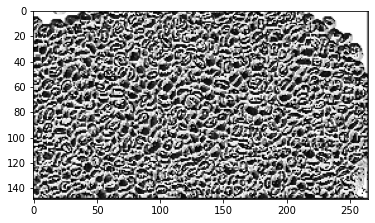

In [0]:
plt.imshow(listImgLBP[0], cmap="gray")

## Random Forrest Classifier

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.770949720670391


### Try KNN Classifier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.8324022346368715


## SVM Classfier

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  361
Jumlah data test:  179


In [0]:
from sklearn import svm
clf = svm.SVC(gamma="auto")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [0]:
from sklearn import metrics
print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.3016759776536313
